<a href="https://www.kaggle.com/code/yahyafaisal2000/intelligent-waste-monitoring-system-ipynb?scriptVersionId=188692064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **New Code**

# **Install necessary packages**

In [2]:
!pip install roboflow
!pip install torch
!pip install tensorflow
!pip install opencv-python-headless
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


# **Create directories**

In [5]:
import os

base_dir = "dataset"
os.makedirs(base_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, "images/train"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "images/val"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "labels/train"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "labels/val"), exist_ok=True)


# **Create data.yaml**

In [6]:
data_yaml_content = """
train: dataset/images/train
val: dataset/images/val

nc: 3
names: ["Trash", "Trash Can Full", "Trash Can Empty"]
"""

# Write the data.yaml file
with open(os.path.join(base_dir, 'data.yaml'), 'w') as f:
    f.write(data_yaml_content)


# **Clone YOLOv5 repository and install dependencies**

In [7]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16799, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 16799 (delta 185), reused 180 (delta 95), pack-reused 16459
Receiving objects: 100% (16799/16799), 15.56 MiB | 38.13 MiB/s, done.
Resolving deltas: 100% (11484/11484), done.
/kaggle/working/yolov5


/usr/local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 21.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [8]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


# **Download dataset from Roboflow**

In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="iOyKrCHzhQe6xSRyHBcy")
project = rf.workspace().project("garbage-detection-lwlwj")
dataset = project.version("1").download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Garbage-detection-1 in yolov5pytorch:: 100%|██████████| 888/888 [00:00<00:00, 6046.57it/s]


# **Train YOLOv5 model**

In [11]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache


[Errno 2] No such file or directory: 'yolov5'
/kaggle/working/yolov5


This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.


E0000 00:00:1721211859.696257     161 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D0717 10:24:19.704593372     161 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0717 10:24:19.704614194     161 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0717 10:24:19.704618942     161 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0717 10:24:19.704622410     161 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0717 10:24:19.704625887     161 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

# **Display images and predictions**

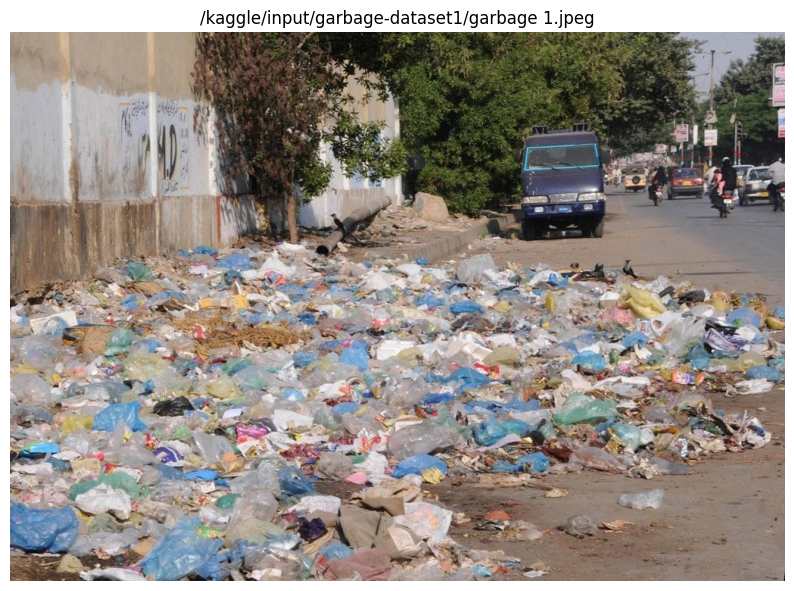

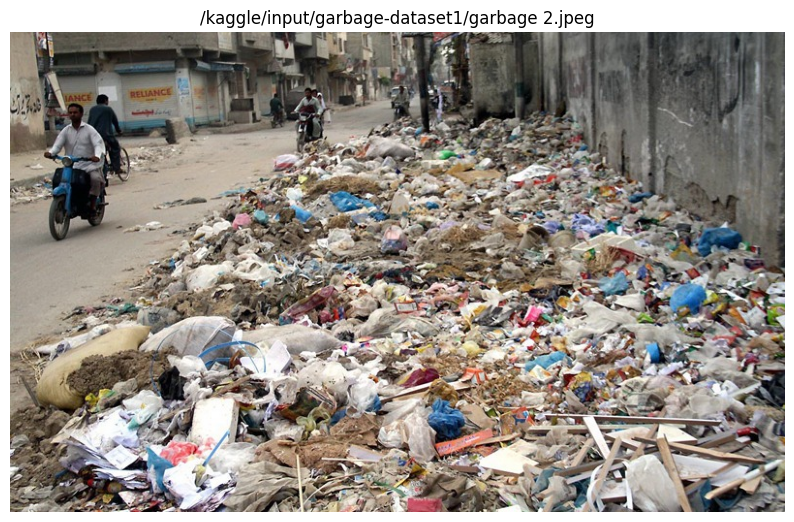

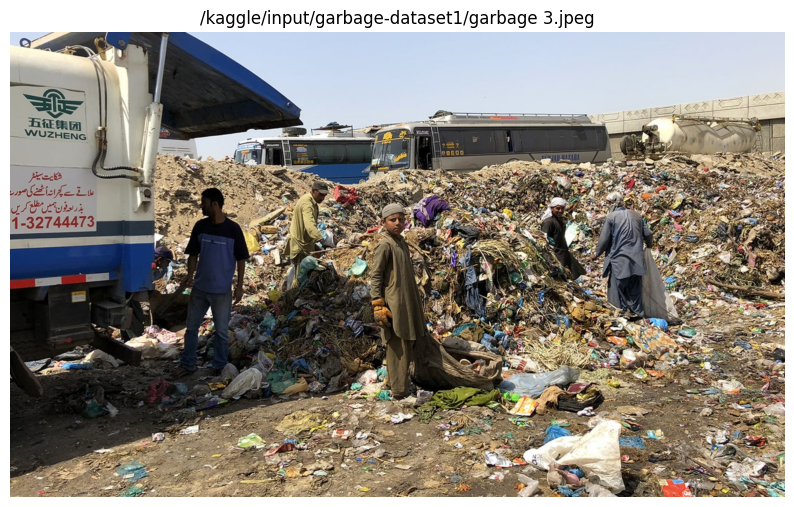

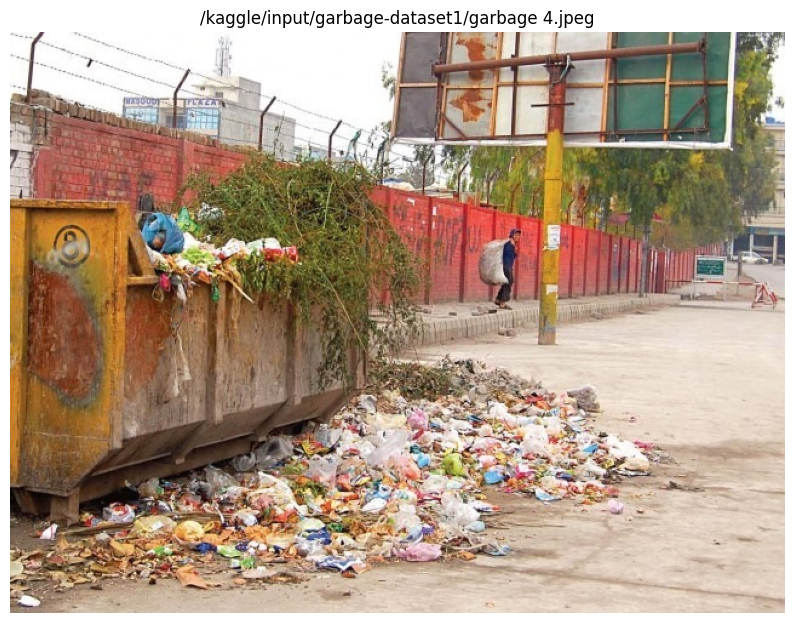

In [12]:
import cv2
import matplotlib.pyplot as plt

# Paths to your images
image_paths = ["/kaggle/input/garbage-dataset1/garbage 1.jpeg", "/kaggle/input/garbage-dataset1/garbage 2.jpeg", "/kaggle/input/garbage-dataset1/garbage 3.jpeg", "/kaggle/input/garbage-dataset1/garbage 4.jpeg"]

# Read and display the images
for image_path in image_paths:
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB (since OpenCV uses BGR by default and Matplotlib expects RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(image_path)
    plt.axis('off')
    plt.show()


# **Display predictions**

loading Roboflow workspace...
loading Roboflow project...


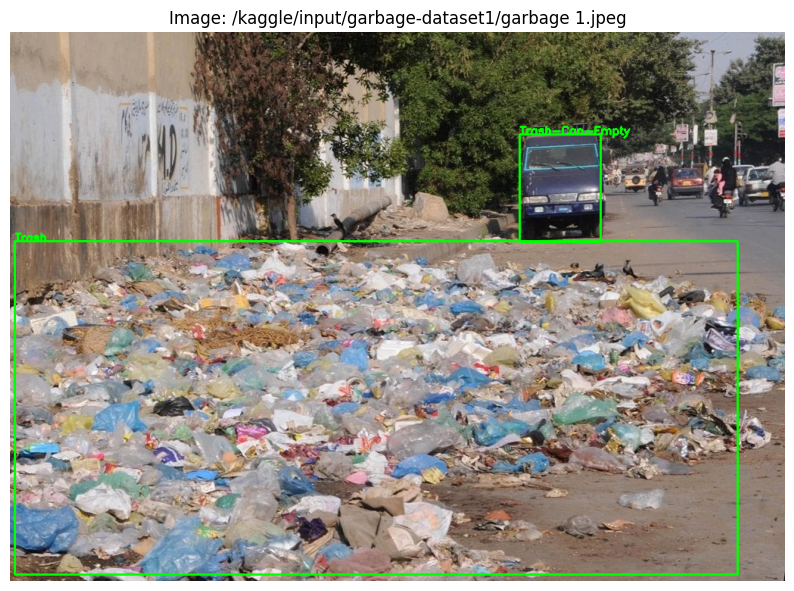

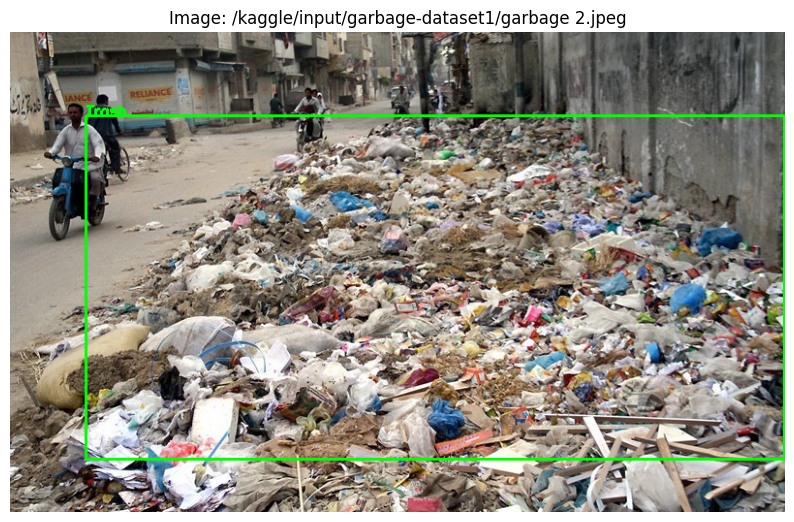

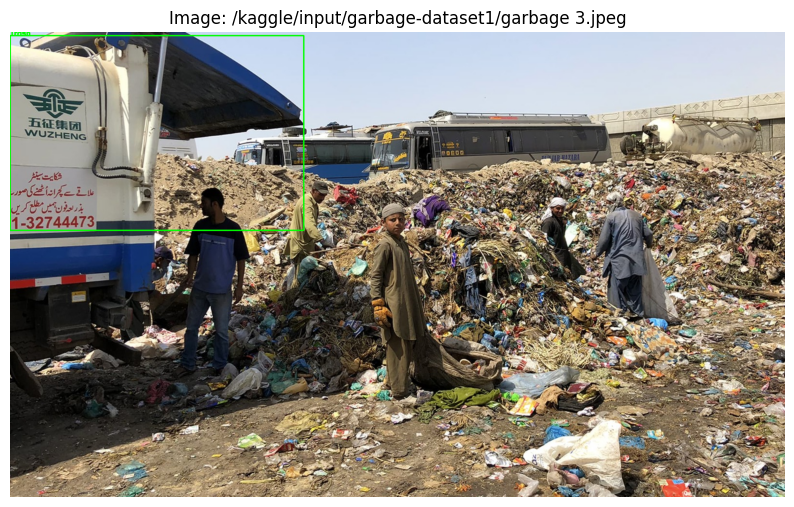

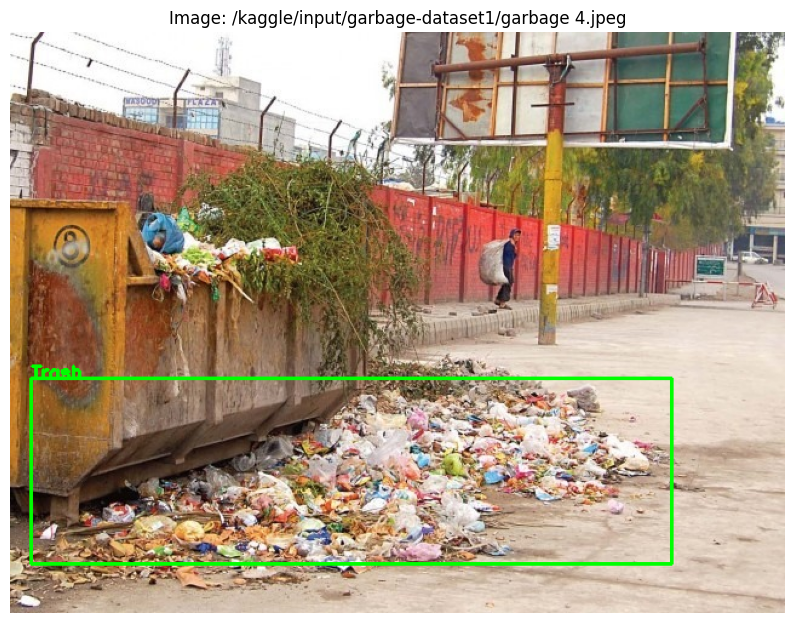

In [14]:
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt

# Initialize Roboflow model
rf = Roboflow(api_key="iOyKrCHzhQe6xSRyHBcy")
project = rf.workspace().project("garbage-detection-lwlwj")
model = project.version("1").model

def display_image_with_predictions(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Get predictions from the model
    predictions = model.predict(image_path, confidence=40, overlap=30).json()

    # Display the predictions on the image
    for prediction in predictions['predictions']:
        x, y, width, height = prediction['x'], prediction['y'], prediction['width'], prediction['height']
        label = prediction['class']

        # Draw bounding box
        start_point = (int(x - width / 2), int(y - height / 2))
        end_point = (int(x + width / 2), int(y + height / 2))
        cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)

        # Put label
        cv2.putText(image, label, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with predictions using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image: {image_path}")
    plt.show()

# List of paths to your images
image_paths = ["/kaggle/input/garbage-dataset1/garbage 1.jpeg", "/kaggle/input/garbage-dataset1/garbage 2.jpeg", "/kaggle/input/garbage-dataset1/garbage 3.jpeg", "/kaggle/input/garbage-dataset1/garbage 4.jpeg"]

# Display predictions for each image
for image_path in image_paths:
    display_image_with_predictions(image_path)


# **Confusion Matrix**

loading Roboflow workspace...
loading Roboflow project...


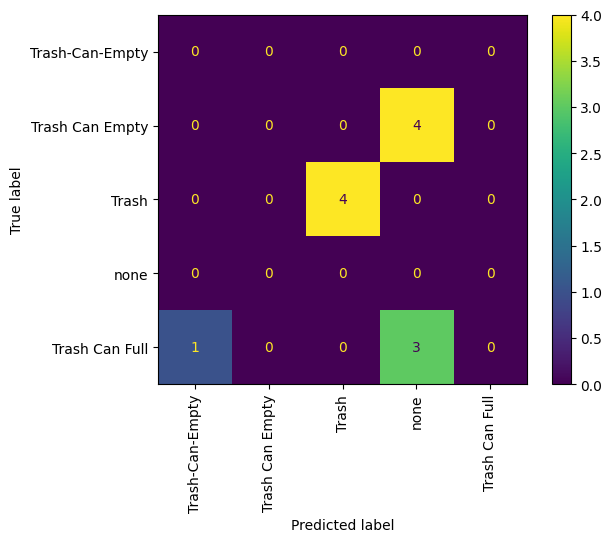

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
import matplotlib.pyplot as plt

# Paths to your images and their corresponding ground truth labels
image_paths = ["/kaggle/input/garbage-dataset1/garbage 1.jpeg", "/kaggle/input/garbage-dataset1/garbage 2.jpeg", "/kaggle/input/garbage-dataset1/garbage 3.jpeg", "/kaggle/input/garbage-dataset1/garbage 4.jpeg"]
ground_truth_labels = [
    ["Trash", "Trash Can Full", "Trash Can Empty"], # Placeholder for image 1
    ["Trash", "Trash Can Full", "Trash Can Empty"], # Placeholder for image 2
    ["Trash", "Trash Can Full", "Trash Can Empty"], # Placeholder for image 3
    ["Trash", "Trash Can Full", "Trash Can Empty"]  # Placeholder for image 4
]

# Initialize Roboflow model
rf = Roboflow(api_key="iOyKrCHzhQe6xSRyHBcy")
project = rf.workspace().project("garbage-detection-lwlwj")
model = project.version("1").model

# Collect predictions and ground truth
y_true = []
y_pred = []
for idx, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)

    # Get predictions from the model
    predictions = model.predict(image_path, confidence=40, overlap=30).json()

    # Collect ground truth labels for this image
    true_labels = ground_truth_labels[idx]

    # Collect predicted labels for this image
    predicted_labels = [pred['class'] for pred in predictions['predictions']]

    # Ensure the lengths match by adding placeholders if necessary
    max_len = max(len(true_labels), len(predicted_labels))
    true_labels.extend(["none"] * (max_len - len(true_labels)))
    predicted_labels.extend(["none"] * (max_len - len(predicted_labels)))

    y_true.extend(true_labels)
    y_pred.extend(predicted_labels)

# Ensure the labels are aligned correctly
unique_labels = list(set(y_true + y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_labels)

# Plot the confusion matrix
cmd.plot(xticks_rotation='vertical')
plt.show()
